## Exploratory Data Analysis (EDA) - Laptops Pricing dataset

#### Objectives 

1. Visualize individual feature patterns
2. Run descriptive statistical analysis on the dataset
3. Use groups and pivot tables to find the effect of categorical variables on price
4. Use pearson corellation to measure the interdependence between variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
file_name = 'cleandata_laptop_pricin_df.csv'

In [3]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False


### Task 1 - Visualize individual feature patterns

##### Continuous valued features

(Note - Detailed explanation of continuous numerical variables and categorical variables are explained in "EDA - Old Cars Pricing" file, please do refer that file before this for better understanding.) 

Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch", and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".

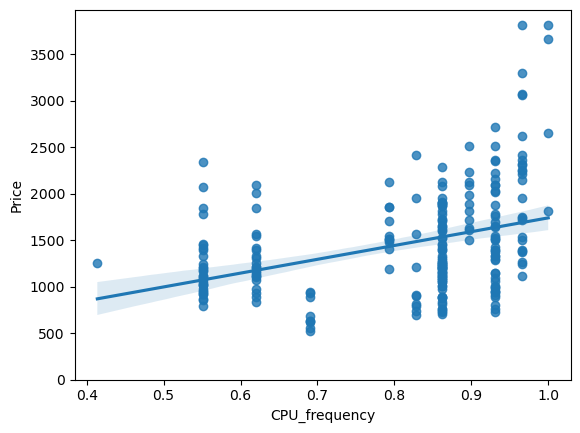

In [4]:
sns.regplot(x= "CPU_frequency", y = "Price", data = df)
plt.ylim(0,)
plt.show()

In [8]:
df[['CPU_frequency', 'Price']].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


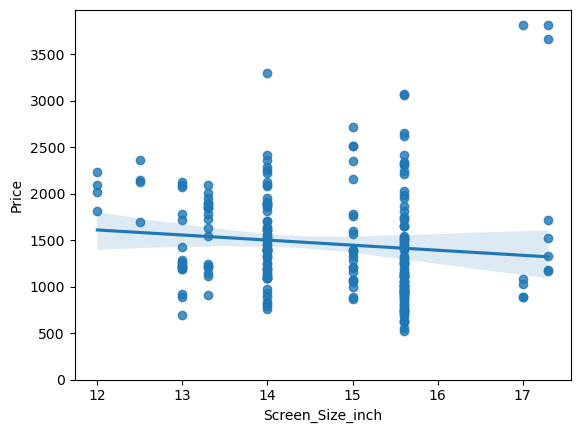

In [10]:
sns.regplot(x = 'Screen_Size_inch', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

In [11]:
df[['Screen_Size_inch', 'Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


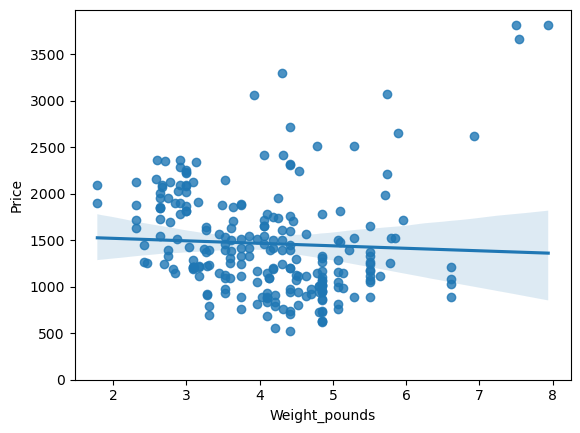

In [12]:
sns.regplot(x ='Weight_pounds', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

In [13]:
df[['Weight_pounds', 'Price']].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


Interpretation - "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

#### Categorical Features

Generate Box plots for the different feature that holds categorical values. These features would be "Category", "GPU","OS", "Cpu_core", "RAM_GB", "Storage_GB_SSD"

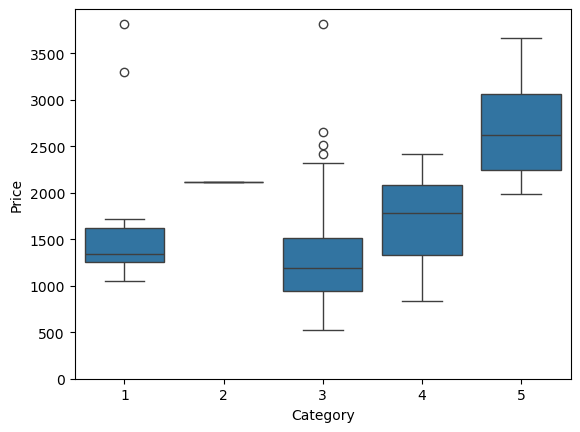

In [14]:
#Category Box plot
sns.boxplot(x = 'Category', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

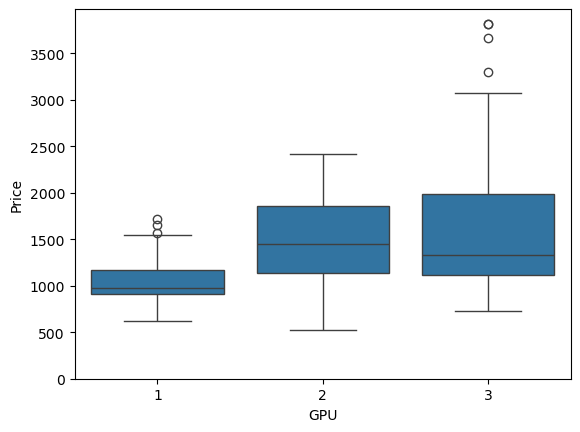

In [15]:
#GPU Box plot
sns.boxplot(x = 'GPU', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

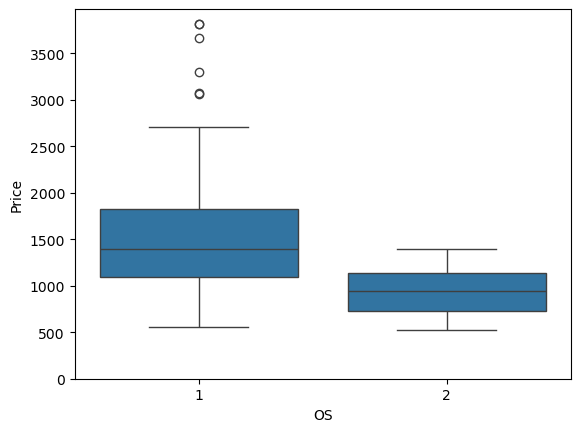

In [16]:
#OS box plot
sns.boxplot(x = 'OS', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

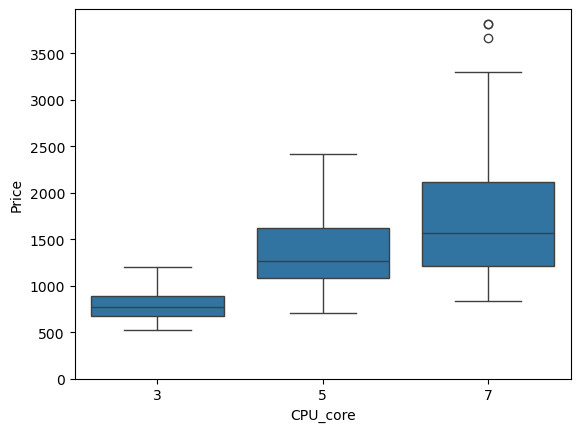

In [17]:
# CPU_core box plot
sns.boxplot(x = 'CPU_core', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

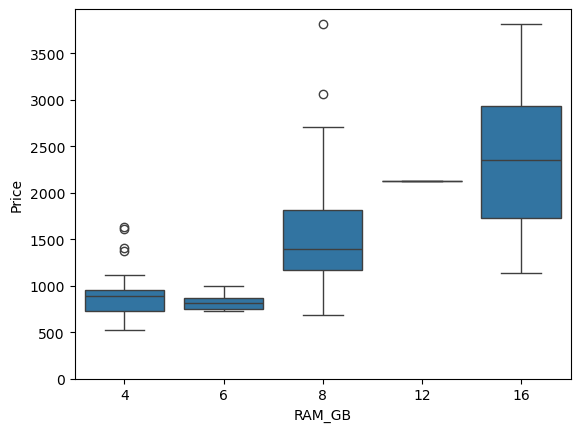

In [18]:
#RAM_GB Box plot
sns.boxplot(x = 'RAM_GB', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

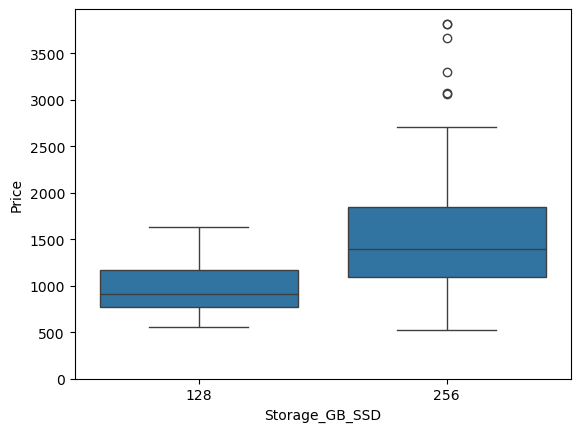

In [19]:
# Storage_GB_SSD Box plot
sns.boxplot(x = 'Storage_GB_SSD', y = 'Price', data = df)
plt.ylim(0,)
plt.show()

#### Task 2- Descriptive Statistical Analysis

Generate the statistical description of all the feautures being used in the data set. include 'object' data types as well.

In [20]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000


In [21]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


#### Task 3 - Groupby and Pivot tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualise this connection using the pcolor plot.

In [23]:
# creating group
df_gtest = df[['GPU', 'CPU_core', 'Price']]
grouped_test1 = df_gtest.groupby(['GPU', 'CPU_core'], as_index = False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [24]:
# creating the pivot table
grouped_pivot = grouped_test1.pivot(index = 'GPU', columns = 'CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


In [25]:
#create the plot
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

#### Task 4 - Pearson Correlation and P-values

In [30]:
for param in ['RAM_GB', 'CPU_frequency', 'Storage_GB_SSD', 'Screen_Size_inch', 'Weight_pounds', 'CPU_core', 'OS', 'GPU', 'Category']:
    pearson_coef, p_values = stats.pearsonr(df[param], df['Price'])
    print (param)
    print ('The Pearson Correlation Coefficient for', param, 'is', pearson_coef, 'with a P-value of P =', p_values)

RAM_GB
The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857841 with a P-value of P = 3.6815606288429613e-20
CPU_frequency
The Pearson Correlation Coefficient for CPU_frequency is 0.36666555892588604 with a P-value of P = 5.5024633507134225e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.2434207552181029 with a P-value of P = 0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for Screen_Size_inch is -0.11064420817118269 with a P-value of P = 0.08853397846830766
Weight_pounds
The Pearson Correlation Coefficient for Weight_pounds is -0.05031225837751549 with a P-value of P = 0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for CPU_core is 0.45939777733551157 with a P-value of P = 7.912950127009034e-14
OS
The Pearson Correlation Coefficient for OS is -0.2217298011482738 with a P-value of P = 0.0005696642559246749
GPU
The Pearson Correlation Coefficient for GPU is 0.2882981988881428 with a P-value of P = 6.